# Program 1

In [8]:
import numpy as np
#define unit step function
def unitStep(v):
    if v<0:
        return 1
    else:
        return 0
#design Perceptron model
def perceptronModel(x,w,b):
    v=np.dot(w,x)+b
    y=unitStep(v)
    return y

#NOT logic function
#wNOT=-1,bNOT=0.5
def NOT_logicFunction(x):
    wNOT=2
    bNOT=-1
    return perceptronModel(x,wNOT,bNOT)

#AND logic function
#here w1=wAND=1,
#w2=wAND=1,bAND=-1.5
def AND_logicFunction(x):
    w=np.array([-2,-2])
    bAND=2
    return perceptronModel(x,w,bAND)

#OR logic function
#w1=1,w2=1,bOR=-0.5
def OR_logicFunction(x):
    w=np.array([-2,-2])
    bOR=1
    return perceptronModel(x,w,bOR)

#XOR logic function
#with AND, OR and NOT
#function calls in sequence
def XOR_logicFunction(x):
    y1=AND_logicFunction(x)
    y2=OR_logicFunction(x)
    y3=NOT_logicFunction(y1)
    final_x=np.array([y2,y3])
    finalOutput=AND_logicFunction(final_x)
    return finalOutput
#testing the perceptron model
test1=np.array([0,1])
test2=np.array([1,1])
test3=np.array([0,0])
test4=np.array([1,0])

print("XOR({},{})={}".format(0,1,XOR_logicFunction(test1)))
print("XOR({},{})={}".format(1,1,XOR_logicFunction(test2)))
print("XOR({},{})={}".format(0,0,XOR_logicFunction(test3)))
print("XOR({},{})={}".format(1,0,XOR_logicFunction(test4)))

XOR(0,1)=1
XOR(1,1)=0
XOR(0,0)=0
XOR(1,0)=1


# Program 2

C:\Users\HP\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training with SGD optimizer (ReLU activation): 
Epoch 1/32 - SGD loss: 0.4579 
Epoch 2/32 - SGD loss: 0.4083 
Epoch 3/32 - SGD loss: 0.4019 
Epoch 4/32 - SGD loss: 0.3981 
Epoch 5/32 - SGD loss: 0.3956 
Epoch 6/32 - SGD loss: 0.3931 
Epoch 7/32 - SGD loss: 0.3907 
Epoch 8/32 - SGD loss: 0.3891 
Epoch 9/32 - SGD loss: 0.3868 
Epoch 10/32 - SGD loss: 0.3856 
Epoch 11/32 - SGD loss: 0.3844 
Epoch 12/32 - SGD loss: 0.3830 
Epoch 13/32 - SGD loss: 0.3816 
Epoch 14/32 - SGD loss: 0.3806 
Epoch 15/32 - SGD loss: 0.3795 
Epoch 16/32 - SGD loss: 0.3784 
Epoch 17/32 - SGD loss: 0.3774 
Epoch 18/32 - SGD loss: 0.3766 
Epoch 19/32 - SGD loss: 0.3754 
Epoch 20/32 - SGD loss: 0.3747 
Epoch 21/32 - SGD loss: 0.3737 
Epoch 22/32 - SGD loss: 0.3731 
Epoch 23/32 - SGD loss: 0.3720 
Epoch 24/32 - SGD loss: 0.3714 
Epoch 25/32 - SGD loss: 0.3707 
Epoch 26/32 - SGD loss: 0.3701 
Epoch 27/32 - SGD loss: 0.3695 
Epoch 28/32 - SGD loss: 0.3685 
Epoch 29/32 - SGD loss: 0.3679 
Epoch 30/32 - SGD loss: 0.3673 


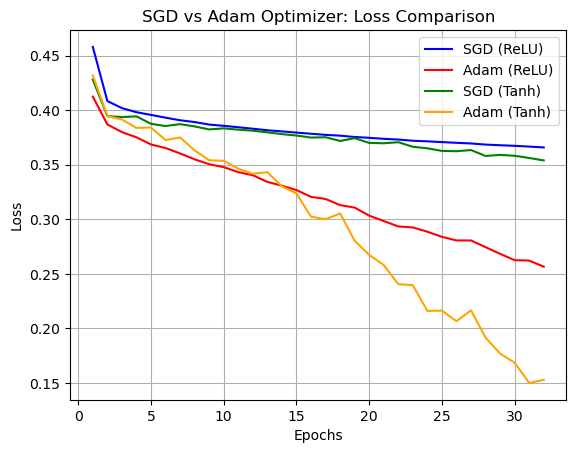

In [9]:
from tensorflow.keras import layers, models, optimizers
import numpy as np
import matplotlib.pyplot as plt

def create_data():
    X = np.random.randn(1000, 10)
    y = np.random.randn(1000, 1)
    return X, y

def create_model(act):
    model = models.Sequential([
        layers.Dense(50, activation=act, input_shape=(10,)),
        layers.Dense(20, activation=act),
        layers.Dense(1)
    ])
    return model

def train_model_with_history(model, optimizer, X, y, batch_size, epochs, optimizer_name):
    model.compile(optimizer=optimizer, loss=tf.keras.losses.Huber())
    history = []
    for epoch in range(epochs):
        hist = model.fit(X, y, batch_size=batch_size, epochs=1, verbose=0)
        loss = hist.history['loss'][0]
        history.append(loss)
        print(f'Epoch {epoch + 1}/{epochs} - {optimizer_name} loss: {loss:.4f} ')
    return history

X, y = create_data()

model_sgd1 = create_model('relu')
model_adam1 = create_model('relu')
model_sgd2 = create_model('tanh')
model_adam2 = create_model('tanh')

optimizer_sgd = optimizers.SGD(learning_rate=0.01)
optimizer_adam = optimizers.Adam(learning_rate=0.002)

epochs = 32
batch_size = 32

print('\nTraining with SGD optimizer (ReLU activation): ')
sgd_loss = train_model_with_history(model_sgd1, optimizer_sgd, X, y, batch_size, epochs, 'SGD')

print('\nTraining with Adam optimizer (ReLU activation): ')
adam_loss = train_model_with_history(model_adam1, optimizer_adam, X, y, batch_size, epochs, 'Adam')

print('\nTraining with SGD optimizer (Tanh activation): ')
sgd_loss2 = train_model_with_history(model_sgd2, optimizers.SGD(learning_rate=0.06), X, y, batch_size, epochs, 'SGD')

print('\nTraining with Adam optimizer (Tanh activation): ')
adam_loss2 = train_model_with_history(model_adam2, optimizers.Adam(learning_rate=0.02), X, y, batch_size, epochs, 'Adam')

plt.plot(range(1, epochs + 1), sgd_loss, label='SGD (ReLU)', color='blue')
plt.plot(range(1, epochs + 1), adam_loss, label='Adam (ReLU)', color='red')

plt.plot(range(1, epochs + 1), sgd_loss2, label='SGD (Tanh)', color='green')
plt.plot(range(1, epochs + 1), adam_loss2, label='Adam (Tanh)', color='orange')

plt.title('SGD vs Adam Optimizer: Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


# Program 3

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32')/255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32')/255

C:\Users\HP\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 16ms/step - accuracy: 0.5208 - loss: 1.5389 - val_accuracy: 0.9011 - val_loss: 0.2993
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9334 - loss: 0.2167 - val_accuracy: 0.9569 - val_loss: 0.1378
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9558 - loss: 0.1452 - val_accuracy: 0.9680 - val_loss: 0.1039
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9655 - loss: 0.1154 - val_accuracy: 0.9670 - val_loss: 0.1077
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9690 - loss: 0.1005 - val_accuracy: 0.9743 - val_loss: 0.0865
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9707 - loss: 0.0981
Test Accuracy: 0.9743000268936157


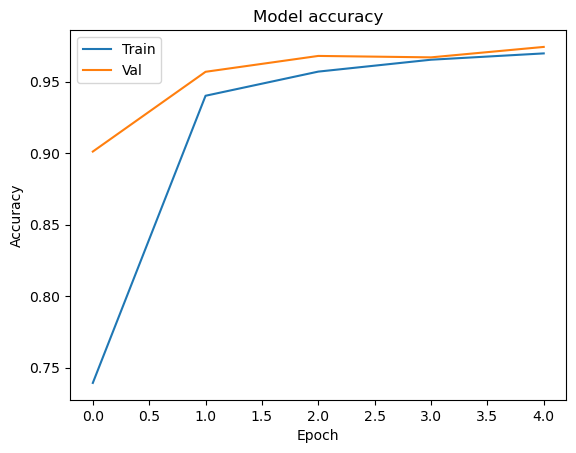

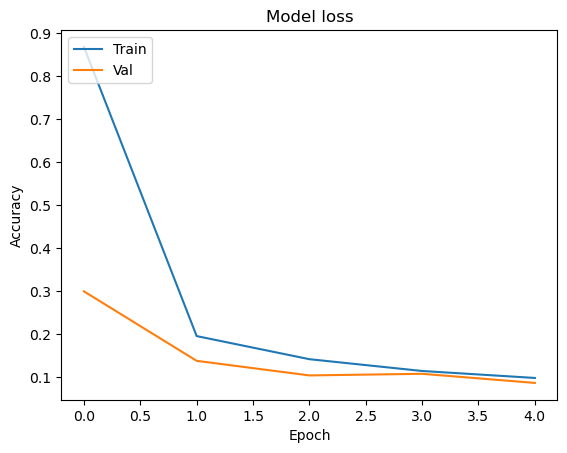

In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test Accuracy: {test_acc}')

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 20ms/step - accuracy: 0.8796 - loss: 0.4152 - val_accuracy: 0.9763 - val_loss: 0.0809
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9768 - loss: 0.0749 - val_accuracy: 0.9796 - val_loss: 0.0662
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.9834 - loss: 0.0539 - val_accuracy: 0.9812 - val_loss: 0.0594
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9883 - loss: 0.0393 - val_accuracy: 0.9844 - val_loss: 0.0506
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.9895 - loss: 0.0335 - val_accuracy: 0.9841 - val_loss: 0.0558
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9797 - loss: 0.0696
Test Accuracy: 0.9840999841690063


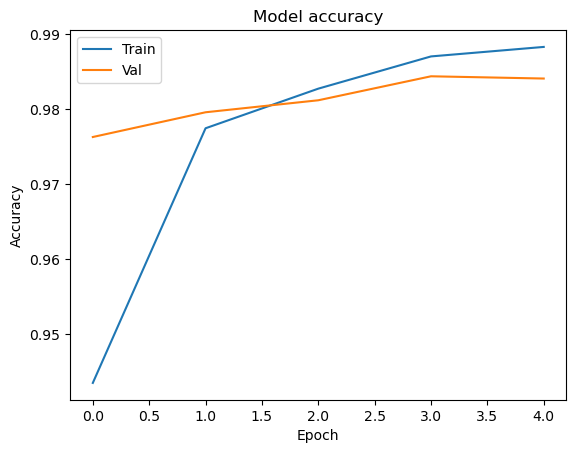

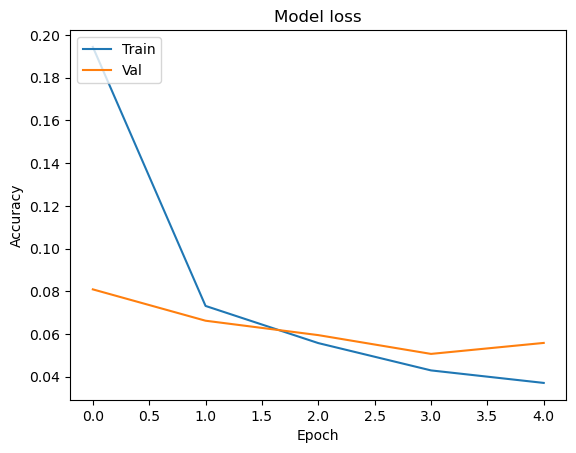

In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='tanh', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='tanh'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='tanh'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='tanh'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test Accuracy: {test_acc}')

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()